In [ ]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, rand_score

# Loading all the important datasets used in q1
x_raw_data = np.load('./x_raw_data.npy')
y_raw_data = np.load('./y_raw_data.npy')
x_pca_data = np.load('./x_pca_data.npy')
y_pca_data = np.load('./y_pca_data.npy')

x_ten_data = np.load('./x_ten_data.npy')
y_ten_data = np.load('./y_ten_data.npy')
x_ten_pca_data = np.load('./x_ten_pca_data.npy')
y_ten_pca_data = np.load('./y_ten_pca_data.npy')

2a.

In [ ]:
# x_raw_data
def cluster(x_data, n=10):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(x_data)

    # print(kmeans.labels_)
    # print(kmeans.cluster_centers_)
    return kmeans

In [ ]:
def closest_images(kmeans, x_data):
    closest_images = np.empty((0,x_raw_data.shape[1]))
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    for i in range(max(kmeans.labels_) + 1):
        cluster_data_points = x_data[labels == i]
        cluster_centroid = centroids[i]
        distances = np.linalg.norm(cluster_data_points - cluster_centroid,axis=1)
        closest_images = np.append(closest_images, [x_raw_data[np.argmin(distances)]], axis=0)  # use original data of image

    print(closest_images)
    return closest_images

In [ ]:
def label_clusters(kmean, y_data):
    cluster_to_label = np.empty((0,))
    labels = kmean.labels_
    for i in range(0,max(kmean.labels_) + 1):
        temp = y_data[labels == i]
        counts = {j:0 for j in range(0,10)}     # count frequency of digits in cluster
        for j in temp:
            counts[int(j%10)] += 1
        print('cluster', i, '-->', counts)

        mode = st.mode(temp).mode
        cluster_to_label = np.append(cluster_to_label,mode)

    return cluster_to_label
    print(cluster_to_label)

In [ ]:
kmeans_raw = cluster(x_raw_data)
closest_images_raw = closest_images(kmeans_raw, x_raw_data)
cluster_to_label_raw = label_clusters(kmeans_raw,y_raw_data)

In [ ]:
kmeans_ten = cluster(x_pca_data[:,:10])
closest_images_ten = closest_images(kmeans_ten, x_pca_data[:,:10])
cluster_to_label_ten = label_clusters(kmeans_ten,y_pca_data)

In [ ]:
kmeans_26 = cluster(x_pca_data[:,:26])
closest_images_26 = closest_images(kmeans_26, x_pca_data[:,:26])
cluster_to_label_26 = label_clusters(kmeans_26,y_pca_data)

We can observe that each cluster created by the each of the three kmeans model has some amount of images from all the labels/digits.

In [70]:
def features_to_image(features):
    features = features.astype('uint8').reshape((32,32,3))
    plt.figure(figsize=(2,2))
    plt.imshow(features)
    # plt.imshow(features_reconstructed)


/var/folders/kh/88xfpsvj1txg7tgxsx6_54380000gn/T/ipykernel_4333/2428850389.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(2,2))


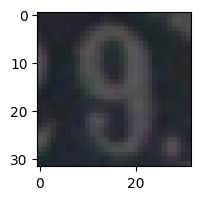

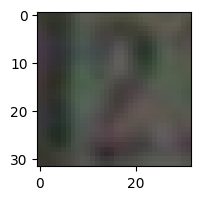

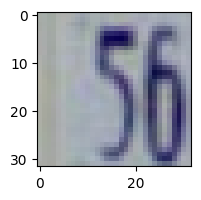

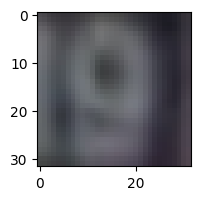

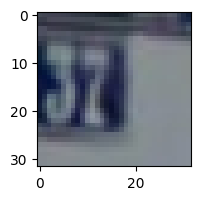

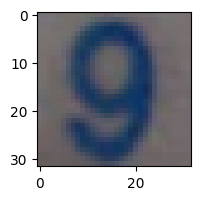

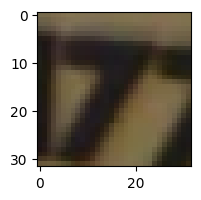

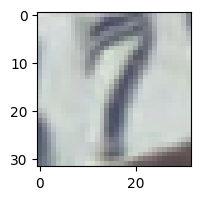

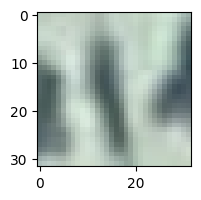

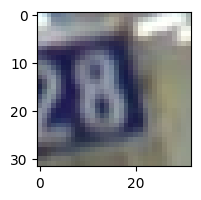

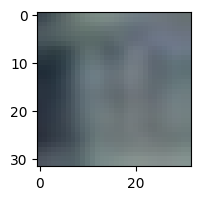

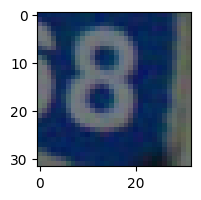

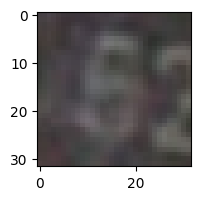

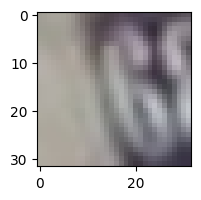

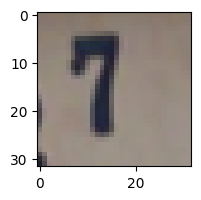

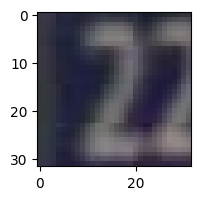

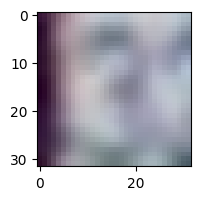

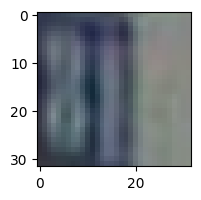

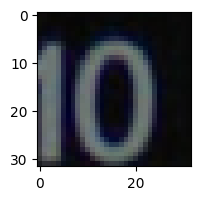

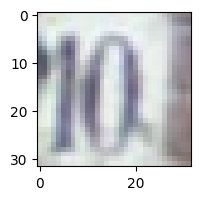

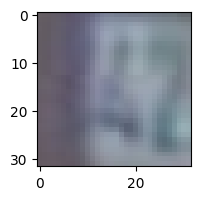

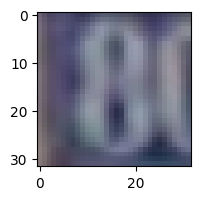

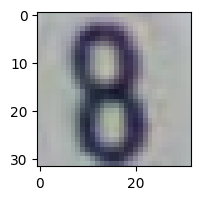

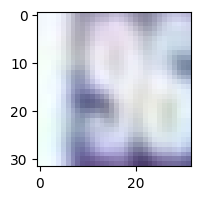

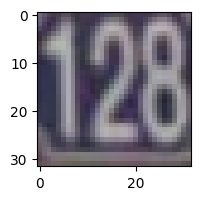

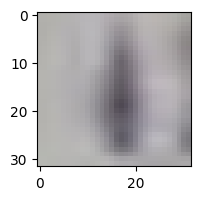

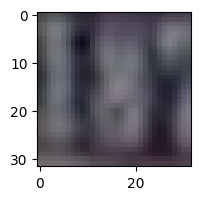

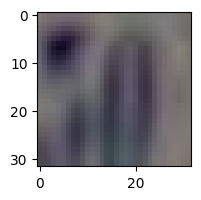

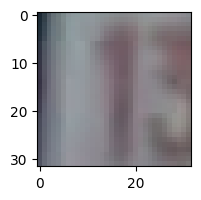

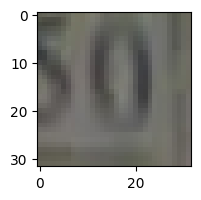

In [71]:
for img in closest_images_raw:
    features_to_image(img)

for img in closest_images_ten:
    features_to_image(img)

for img in closest_images_26:
    features_to_image(img)


2b.

In [ ]:
def calculate_sse(kmeans,x_data):
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sse = 0
    k = max(kmeans.labels_) 
    for i in range(k+ 1):
        cluster_data_points = x_data[labels == i]
        sse += np.sum((cluster_data_points - centroids[i])**2)
        
    return sse

In [ ]:
# Purity measures the extent to which all the data points in a cluster belong to the same class
def calculate_purity(kmean,x_data,y_data):
    y_pred = kmean.predict(x_data)
    # TODO: map from cluster_num to label

    conf_mat = confusion_matrix(y_data,y_pred)
    purity = np.sum(np.amax(conf_mat,axis=0)) / np.sum(conf_mat)

    return purity

In [ ]:
# Rand-index is a measure of similarity between true and predicted clusterings
def calculate_rand_index(kmean,x_data,y_data):
    y_pred = kmean.predict(x_data)
    rand_index = rand_score(y_data,y_pred)

    return rand_index

In [72]:
sse_raw = calculate_sse(kmeans_raw,x_raw_data)
purity_raw = calculate_purity(kmeans_raw,x_raw_data,y_raw_data)
rand_index_raw = calculate_rand_index(kmeans_raw,x_raw_data,y_raw_data)

print(purity_raw)
print(rand_index_raw)
print(sse_raw)

0.11716
0.8088964518580744
80585356911.52354


In [ ]:
sse_ten = calculate_sse(kmeans_ten,x_pca_data[:,:10])
purity_ten = calculate_purity(kmeans_ten,x_pca_data[:,:10],y_pca_data)
rand_index_ten = calculate_rand_index(kmeans_ten,x_pca_data[:,:10],y_pca_data)

print(purity_ten)
print(rand_index_ten)
print(sse_ten)

In [ ]:
sse_26 = calculate_sse(kmeans_26,x_pca_data[:,:26])
purity_26 = calculate_purity(kmeans_26,x_pca_data[:,:26],y_pca_data)
rand_index_26 = calculate_rand_index(kmeans_26,x_pca_data[:,:26],y_pca_data)

print(purity_26)
print(rand_index_26)
print(sse_26)

2c.

In [78]:
print('Cluster to class mapping according to frequencies in kmeans_raw -> ', cluster_to_label_raw)
y_pred_raw = cluster_to_label_raw[kmeans_raw.predict(x_raw_data)]
accuracy_raw = accuracy_score(y_raw_data,y_pred_raw)
print('Accuracy of Kmeans_raw is ',accuracy_raw)

print('Cluster to class mapping according to frequencies in kmeans_ten -> ', cluster_to_label_ten)
y_pred_ten = cluster_to_label_ten[kmeans_ten.predict(x_pca_data[:,:10])]
accuracy_ten = accuracy_score(y_pca_data,y_pred_ten)
print('Accuracy of Kmeans_ten is ',accuracy_ten)

print('Cluster to class mapping according to frequencies in kmeans_26 -> ', cluster_to_label_26)
y_pred_26 = cluster_to_label_26[kmeans_26.predict(x_pca_data[:,:26])]
accuracy_26 = accuracy_score(y_pca_data,y_pred_26)
print('Accuracy of Kmeans_26 is ',accuracy_26)

Cluster to class mapping according to frequencies in kmeans_raw ->  [10.  9. 10.  6.  1.  4.  8.  1.  1.  6.]
Accuracy of Kmeans_raw is  0.11716
Cluster to class mapping according to frequencies in kmeans_ten ->  [ 1.  1.  4.  6.  9. 10. 10.  8.  6.  1.]
Accuracy of Kmeans_ten is  0.11732
Cluster to class mapping according to frequencies in kmeans_26 ->  [ 2.  8.  1.  1.  4. 10. 10.  6.  6.  9.]
Accuracy of Kmeans_26 is  0.1174


2d.

In [74]:
# k = 5
kmeans_26_k5 = cluster(x_pca_data[:,:26],5)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [76]:
sse = calculate_sse(kmeans_26_k5,x_pca_data[:,:26])
print('Sum Squared Error for this case = ',sse)
labels = label_clusters(kmeans_26_k5,y_pca_data)
print(labels)

Sum Squared Error for this case =  70711365443.00693
cluster 0 --> {0: 467, 1: 465, 2: 460, 3: 427, 4: 392, 5: 454, 6: 400, 7: 407, 8: 419, 9: 372}
cluster 1 --> {0: 479, 1: 534, 2: 513, 3: 539, 4: 553, 5: 543, 6: 520, 7: 573, 8: 483, 9: 533}
cluster 2 --> {0: 184, 1: 173, 2: 177, 3: 172, 4: 182, 5: 191, 6: 215, 7: 174, 8: 190, 9: 166}
cluster 3 --> {0: 630, 1: 628, 2: 618, 3: 607, 4: 640, 5: 602, 6: 628, 7: 656, 8: 711, 9: 637}
cluster 4 --> {0: 740, 1: 700, 2: 732, 3: 755, 4: 733, 5: 710, 6: 737, 7: 690, 8: 697, 9: 792}
[10.  7.  6.  8.  9.]


We can observe that each cluster created by the k-means model has some amount of images from all the labels/digits.